# Final Goal

Our ultimate aim is to build a robust forecasting model for pedestrian counts based on historical data. This involves several key objectives:

- **Actionable Predictions:**  
  The model should provide reliable forecasts to assist urban planners, traffic managers, and other stakeholders in making data-driven decisions.

- **Optimized Performance:**  
  By fine-tuning the model through hyperparameter tuning and error analysis, we aim to minimize prediction errors and enhance overall accuracy.

- **Complete End-to-End Workflow:**  
  The project showcases a comprehensive data science pipeline, including:
  - Data cleaning and preprocessing
  - Feature engineering and exploratory data analysis (EDA)
  - Model building, training, and evaluation
  - Deployment and forecasting for real-world applications

In summary, the goal is to create a dependable tool for accurately predicting pedestrian traffic, ultimately supporting effective planning and resource allocation.


# Step 1: Data Loading & Initial Cleaning

- **Dataset Loaded:** CSV file imported into a pandas DataFrame.
- **Data Inspection:** Viewed the first 10 rows to understand column names and structure.
- **Missing Values:** Verified that no columns had missing data.
- **Data Types:** Converted `Sensing_Date` from object to datetime for time-based operations.
- **Duplicates Check:** Confirmed there were no duplicate records.
- **Data Consistency:** Validated that `Total_of_Directions` equals `Direction_1` + `Direction_2`.
- **Location Processing:** Split the `Location` column into separate `Latitude` and `Longitude` columns.


In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.0
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf

# Must be done before anything touches the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU memory growth enabled.")
    except RuntimeError as e:
        print("❌ Error enabling GPU memory growth:", e)

✅ GPU memory growth enabled.


In [2]:
import pandas as pd

# ----------------------------------------------------------------------
# Step 1: Load the Dataset
# Why: We need to read the CSV file into a pandas DataFrame to work with the data in Python.
# What will happen: The data is loaded, and we can then inspect the first few rows to understand its structure.
# ----------------------------------------------------------------------
file_path = "pedestrian-counting-system-monthly-counts-per-hour.csv"
df = pd.read_csv(file_path)
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
              ID  Location_ID Sensing_Date  HourDay  Direction_1  Direction_2  \
0   531020230827           53   2023-08-27       10          364          284   
1    65420220123           65   2022-01-23        4            5           24   
2    17120240125           17   2024-01-25        1           18           53   
3  1381520250207          138   2025-02-07       15            8            7   
4    58020211029           58   2021-10-29        0           20           19   
5  1361520241215          136   2024-12-15       15           52           36   
6  1421520240604          142   2024-06-04       15          153          139   
7   212120240315           21   2024-03-15       21          433          651   
8    56420240418           56   2024-04-18        4            3            5   
9   107520230809          107   2023-08-09        5            3            7   

   Total_of_Directions    Sensor_Name                    Location  
0         

In [3]:
# ----------------------------------------------------------------------
# Step 2: Check for Missing Values
# Why: Missing data can lead to errors or biased models later on. Identifying missing values allows us to handle them appropriately.
# What will happen: We will see a summary of how many missing values each column contains.
# ----------------------------------------------------------------------
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID                     0
Location_ID            0
Sensing_Date           0
HourDay                0
Direction_1            0
Direction_2            0
Total_of_Directions    0
Sensor_Name            0
Location               0
dtype: int64


In [4]:
# ----------------------------------------------------------------------
# Step 3: Inspect Data Types
# Why: Ensuring the correct data types is crucial for operations like time series analysis or arithmetic calculations.
# What will happen: We will get a list of columns with their respective data types, and we can then decide if any conversions are necessary.
# ----------------------------------------------------------------------
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
ID                      int64
Location_ID             int64
Sensing_Date           object
HourDay                 int64
Direction_1             int64
Direction_2             int64
Total_of_Directions     int64
Sensor_Name            object
Location               object
dtype: object


In [5]:
# ----------------------------------------------------------------------
# Step 4: Convert Sensing_Date to Datetime
# Why: Converting the 'Sensing_Date' column to a datetime format enables us to perform time-based operations, such as sorting or resampling.
# What will happen: The 'Sensing_Date' column will be transformed into a pandas datetime object.
# ----------------------------------------------------------------------
df['Sensing_Date'] = pd.to_datetime(df['Sensing_Date'])
print("\nConverted 'Sensing_Date' to datetime format.")
print(df['Sensing_Date'].head())


Converted 'Sensing_Date' to datetime format.
0   2023-08-27
1   2022-01-23
2   2024-01-25
3   2025-02-07
4   2021-10-29
Name: Sensing_Date, dtype: datetime64[ns]


In [6]:
# ----------------------------------------------------------------------
# Step 5: Check for Duplicate Records
# Why: Duplicate rows can skew analysis and lead to incorrect conclusions. Identifying duplicates helps us decide whether to remove them.
# What will happen: We will get a count of how many duplicate rows exist in the DataFrame.
# ----------------------------------------------------------------------
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [7]:
# ----------------------------------------------------------------------
# Step 6: Validate the Consistency of 'Total_of_Directions'
# Why: 'Total_of_Directions' should equal the sum of 'Direction_1' and 'Direction_2'. This check will help us identify any discrepancies.
# What will happen: We will create a computed total and compare it with the provided 'Total_of_Directions' to spot inconsistencies.
# ----------------------------------------------------------------------
df['Computed_Total'] = df['Direction_1'] + df['Direction_2']
inconsistencies = df[df['Total_of_Directions'] != df['Computed_Total']]
print("\nRows with inconsistent total counts:")
print(inconsistencies)


Rows with inconsistent total counts:
Empty DataFrame
Columns: [ID, Location_ID, Sensing_Date, HourDay, Direction_1, Direction_2, Total_of_Directions, Sensor_Name, Location, Computed_Total]
Index: []


In [8]:
# ----------------------------------------------------------------------
# Step 7: Split the 'Location' Column into 'Latitude' and 'Longitude'
# Why: Splitting the coordinates allows for separate numerical analysis of latitude and longitude.
# What will happen: The 'Location' string will be split by the comma, and two new columns ('Latitude' and 'Longitude') will be created and converted to float.
# ----------------------------------------------------------------------
df[['Latitude', 'Longitude']] = df['Location'].str.split(',', expand=True)
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
print("\nExtracted Latitude and Longitude:")
print(df[['Latitude', 'Longitude']].head())


Extracted Latitude and Longitude:
    Latitude   Longitude
0 -37.815642  144.965499
1 -37.815694  144.966806
2 -37.813625  144.973236
3 -37.819965  144.959815
4 -37.816861  144.953581


# Step 2: Exploratory Data Analysis & Feature Engineering

- **Data Aggregation:**  
  Group data by various time intervals (e.g., hour, day, month) to identify trends and seasonal patterns.

- **Visualization:**  
  Create plots (time series, histograms, box plots) to inspect data distribution, detect outliers, and observe pedestrian count fluctuations.

- **Feature Extraction:**  
  Derive new time-related features (e.g., `Year`, `Month`, `Day`, `Weekday`) from `Sensing_Date` to enrich the dataset for modeling.

- **Insight Generation:**  
  Analyze aggregated and visual data to pinpoint peak hours, trends, and anomalies, informing further steps in model development.


In [9]:
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# Step 2.1: Feature Extraction from Sensing_Date
# Why: To enhance the dataset with additional time-related features that can help in trend analysis.
# What will happen: We create new columns for Year, Month, Day, and Weekday from the Sensing_Date column.
# ----------------------------------------------------------------------
df['Year'] = df['Sensing_Date'].dt.year
df['Month'] = df['Sensing_Date'].dt.month
df['Day'] = df['Sensing_Date'].dt.day
df['Weekday'] = df['Sensing_Date'].dt.day_name()  # Alternatively, use .dt.weekday for numeric representation
print("Extracted time features:")
print(df[['Sensing_Date', 'Year', 'Month', 'Day', 'Weekday']].head())

Extracted time features:
  Sensing_Date  Year  Month  Day   Weekday
0   2023-08-27  2023      8   27    Sunday
1   2022-01-23  2022      1   23    Sunday
2   2024-01-25  2024      1   25  Thursday
3   2025-02-07  2025      2    7    Friday
4   2021-10-29  2021     10   29    Friday


In [10]:
# ----------------------------------------------------------------------
# Step 2.2: Aggregate Data by Date
# Why: Aggregating the data by date provides a clearer view of daily pedestrian trends.
# What will happen: We create a new Date column (without time) and group the data by date,
# summing the total counts for each day.
# ----------------------------------------------------------------------
df['Date'] = df['Sensing_Date'].dt.date  # Extract date part only
daily_counts = df.groupby('Date')['Total_of_Directions'].sum().reset_index()
print("\nDaily aggregated pedestrian counts:")
print(daily_counts.head())


Daily aggregated pedestrian counts:
         Date  Total_of_Directions
0  2021-07-01               490497
1  2021-07-02               473679
2  2021-07-03               499704
3  2021-07-04               384302
4  2021-07-05               417179


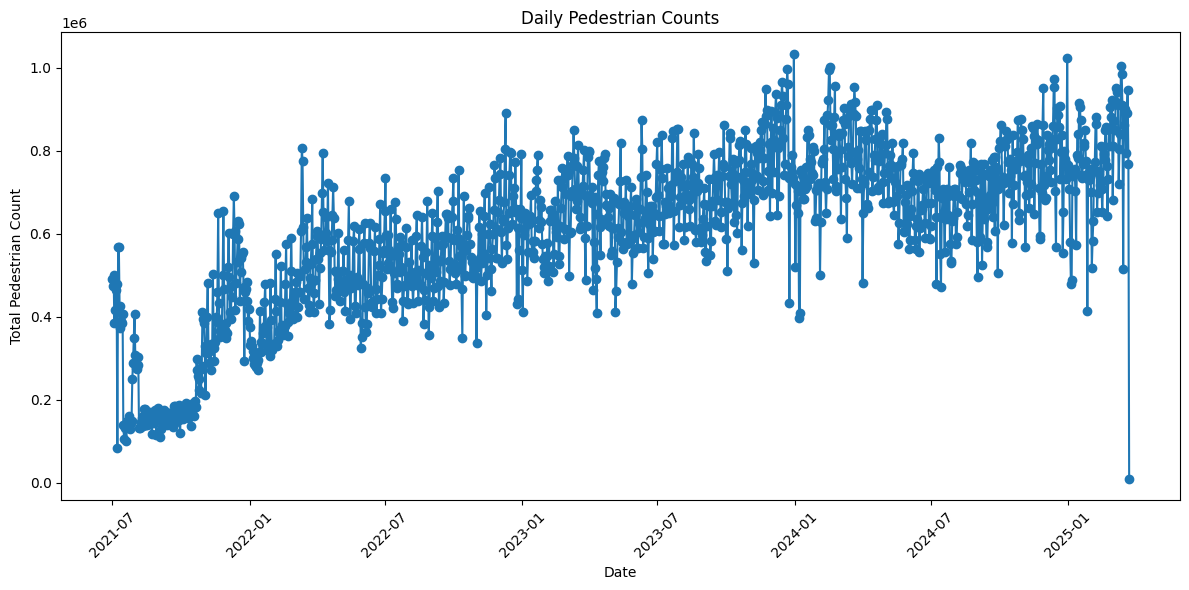

In [11]:
# ----------------------------------------------------------------------
# Step 2.3: Visualize the Time Series of Daily Counts
# Why: Visualizing the time series helps to understand trends, seasonality, and detect anomalies.
# What will happen: A line plot is generated showing the variation of daily total pedestrian counts.
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(daily_counts['Date'], daily_counts['Total_of_Directions'], marker='o', linestyle='-')
plt.title("Daily Pedestrian Counts")
plt.xlabel("Date")
plt.ylabel("Total Pedestrian Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

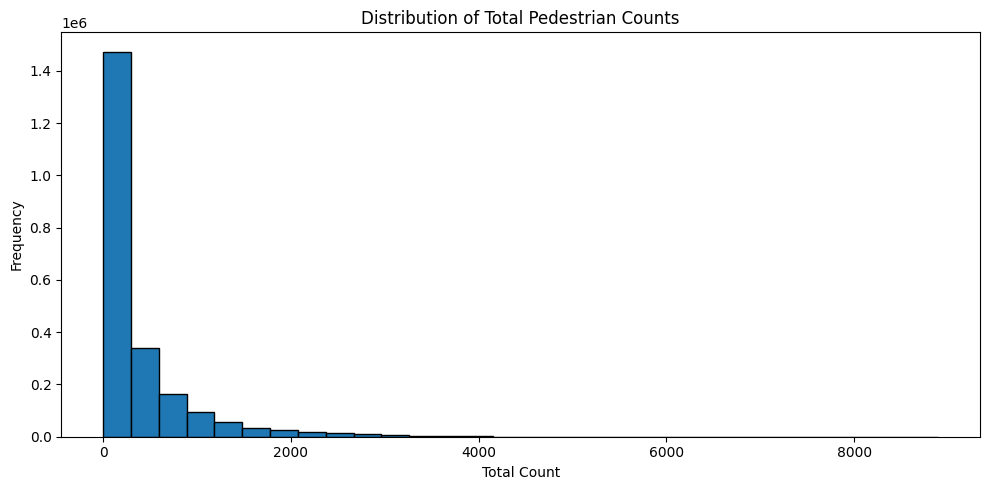

In [12]:
# ----------------------------------------------------------------------
# Step 2.4: Visualize the Distribution of Pedestrian Counts
# Why: To check the overall distribution of pedestrian counts and identify any potential outliers.
# What will happen: A histogram is displayed showing how the total counts are distributed across the dataset.
# ----------------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.hist(df['Total_of_Directions'], bins=30, edgecolor='black')
plt.title("Distribution of Total Pedestrian Counts")
plt.xlabel("Total Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 2: EDA Results & Next Steps

**Results:**
- **Trend:** Daily pedestrian counts show a general upward trend over time, with occasional spikes and dips.
- **Distribution:** Counts are right-skewed, indicating a majority of lower values and a long tail of high counts.
- **Time Features:** Extracting `Year`, `Month`, `Day`, and `Weekday` provides insights into potential weekday/weekend and seasonal patterns.
- **Daily Aggregation:** Summarizing counts by day highlights larger-scale trends, while hourly data retains fine-grained variations.

**Next Steps:**
1. **Stationarity Check:** Determine if transformations (e.g., differencing, log transform) are needed for stable time series analysis.  

# Step 3: Data Preparation for Modeling

- **Sequence Structuring:**  
  Reshape the time-series data into sequences (sliding windows) suitable for RNN models.

- **Normalization:**  
  Scale numerical features to ensure faster and more stable model convergence.

- **Train/Test Split:**  
  Divide the dataset chronologically to avoid data leakage and maintain temporal order.

- **Final Dataset Ready:**  
  A well-prepared, sequential dataset for building and training GRU/LSTM models.

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ----------------------------------------------------------------------
# Step 3.1: Sort and Extract the Time Series Data
# Why: Ensure the data is in chronological order and extract the target time series (Total_of_Directions)
# What will happen: The data is sorted by date, and we extract the pedestrian counts as a numpy array.
# ----------------------------------------------------------------------
daily_counts = daily_counts.sort_values('Date')  # Ensure chronological order
# Extract the 'Total_of_Directions' as a numpy array and reshape for scaling
ts_values = daily_counts['Total_of_Directions'].values.reshape(-1, 1)
print("Time series shape:", ts_values.shape)

Time series shape: (1363, 1)


In [14]:
# ----------------------------------------------------------------------
# Step 3.2: Normalize the Time Series Data
# Why: Normalization improves model training convergence by scaling values to a consistent range.
# What will happen: We use MinMaxScaler to scale the values between 0 and 1.
# ----------------------------------------------------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
ts_normalized = scaler.fit_transform(ts_values)
print("First 5 normalized values:\n", ts_normalized[:5])

First 5 normalized values:
 [[0.46977127]
 [0.45335925]
 [0.47875601]
 [0.3661398 ]
 [0.39822315]]


In [15]:
# ----------------------------------------------------------------------
# Step 3.3: Create Sequences Using a Sliding Window
# Why: RNN models like GRU/LSTM require sequential data; sliding windows create input sequences and targets.
# What will happen: For a given window size (e.g., 7 days), we create sequences (X) and corresponding labels (y)
# ----------------------------------------------------------------------
def create_sequences(data, window_size):
    """
    Create sequences from the time series data.
    
    Parameters:
      data (numpy array): The normalized time series data.
      window_size (int): The number of time steps per input sequence.
      
    Returns:
      X (numpy array): Input sequences of shape (num_samples, window_size, 1).
      y (numpy array): Corresponding target values for each sequence.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        # Append a sequence of 'window_size' consecutive values
        X.append(data[i: i + window_size])
        # The target is the value immediately following the sequence
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 7  # Using the past 7 days to predict the next day
X, y = create_sequences(ts_normalized, window_size)
print("Created sequences - X shape:", X.shape, "y shape:", y.shape)

Created sequences - X shape: (1356, 7, 1) y shape: (1356, 1)


In [16]:
# ----------------------------------------------------------------------
# Step 3.4: Train/Test Split
# Why: Splitting the dataset chronologically prevents data leakage and ensures the model is tested on unseen data.
# What will happen: 80% of the sequences will be used for training and the remaining 20% for testing.
# ----------------------------------------------------------------------
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Training set shapes - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shapes  - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shapes - X_train: (1084, 7, 1) y_train: (1084, 1)
Testing set shapes  - X_test: (272, 7, 1) y_test: (272, 1)


# Step 3: Data Preparation Results

- **Time Series Shape:** (1363, 1)  
  The pedestrian count data has been successfully extracted and sorted chronologically.

- **Normalization:**  
  The first 5 normalized values are shown, indicating that the counts are scaled between 0 and 1.

- **Sequence Creation:**  
  Using a sliding window of 7 days, we created 1356 sequences (X shape: (1356, 7, 1)) with corresponding targets (y shape: (1356, 1)).

- **Train/Test Split:**  
  The data was split chronologically:
  - Training set: 1084 sequences (X_train: (1084, 7, 1), y_train: (1084, 1))
  - Testing set: 272 sequences (X_test: (272, 7, 1), y_test: (272, 1))

# Next Steps

1. **Model Building:**  
   - Construct a GRU or LSTM model tailored for time-series forecasting.

# Step 4: Model Building & Training

- **Architecture:**  
  Build a sequential model with a GRU (or LSTM) layer to capture temporal dependencies, followed by a dense layer for output prediction.

- **Compilation:**  
  Compile the model using the Adam optimizer and mean squared error (MSE) loss for regression.

- **Training:**  
  Train the model on the training sequences, validating on the test set to monitor performance.

- **Evaluation:**  
  Evaluate the model on test data using metrics such as RMSE or MAE to assess forecasting accuracy.

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# ----------------------------------------------------------------------
# Step 4.1: Define the Model Architecture
# Why: We need a model capable of capturing the temporal dependencies in the time series.
# What will happen: We build a sequential model with a GRU layer (50 units) and a dense output layer.
# ----------------------------------------------------------------------
model = Sequential([
    # GRU layer to learn temporal patterns.
    # 'input_shape' is (sequence_length, num_features) which is (7, 1) in our case.
    GRU(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    # Dense layer to predict the output value.
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


# Model Summary and Next Steps

**Model Summary:**
- **Architecture:**  
  - A **GRU Layer** with 50 units that processes the input sequences and outputs a vector of shape `(None, 50)`.  
  - A **Dense Layer** with 1 unit that produces the final regression output.
- **Parameters:**  
  - GRU Layer: 7,950 parameters  
  - Dense Layer: 51 parameters  
  - **Total:** 8,001 trainable parameters

This model is designed to capture the temporal patterns in our time-series data (pedestrian counts) and predict the next value in the sequence.

**Next Steps:**
1. **Model Training:**  
   - Train the model on the training set (`X_train`, `y_train`) for a predefined number of epochs and batch size.
   - Monitor the training and validation loss to check for overfitting or underfitting.

# Step 4: Model Training & Evaluation

- **Compilation:**  
  Model is compiled with the Adam optimizer and MSE loss, setting up the training process.

- **Training:**  
  Model is trained for 20 epochs with a batch size of 16, using validation data to monitor performance.

- **Evaluation:**  
  The test set is used to assess the model's performance by computing the Mean Squared Error (MSE).

- **Visualization:**  
  A plot of training and validation loss over epochs helps diagnose learning behavior and potential overfitting.

Epoch 1/20
68/68 [==============================] - 6s 24ms/step - loss: 0.0977 - val_loss: 0.0180
Epoch 2/20
68/68 [==============================] - 1s 12ms/step - loss: 0.0133 - val_loss: 0.0151
Epoch 3/20
68/68 [==============================] - 1s 13ms/step - loss: 0.0098 - val_loss: 0.0124
Epoch 4/20
68/68 [==============================] - 1s 12ms/step - loss: 0.0083 - val_loss: 0.0122
Epoch 5/20
68/68 [==============================] - 1s 14ms/step - loss: 0.0078 - val_loss: 0.0116
Epoch 6/20
68/68 [==============================] - 1s 12ms/step - loss: 0.0076 - val_loss: 0.0113
Epoch 7/20
68/68 [==============================] - 1s 12ms/step - loss: 0.0073 - val_loss: 0.0110
Epoch 8/20
68/68 [==============================] - 1s 12ms/step - loss: 0.0072 - val_loss: 0.0108
Epoch 9/20
68/68 [==============================] - 1s 11ms/step - loss: 0.0069 - val_loss: 0.0107
Epoch 10/20
68/68 [==============================] - 1s 12ms/step - loss: 0.0068 - val_loss: 0.0116
Epoch 11/

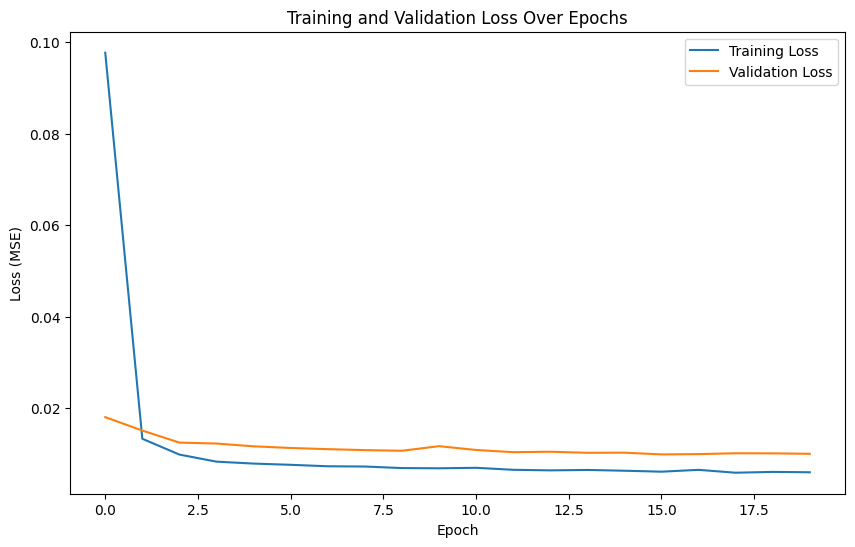

In [18]:
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# Step 4: Model Training & Evaluation
# ----------------------------------------------------------------------

# Compile the model (make sure to run this step before training)
# Why: This sets up the optimizer and loss function, which is necessary before training.
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using the training data and validate on the test set.
# Why: This allows the model to learn from the training data, and the validation set helps monitor performance.
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test data.
# Why: To assess how well the model generalizes to unseen data.
test_loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)

# Plot the training and validation loss over epochs.
# Why: Visualizing the loss curves helps in diagnosing training issues like overfitting.
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Training & Validation Loss Analysis

- **Rapid Initial Decrease:**  
  Both losses drop quickly in the first few epochs, indicating the model quickly learns core patterns.

- **Minor Overfitting:**  
  Validation loss remains slightly higher than training loss, suggesting some overfitting but not severe.

- **Convergence:**  
  Losses stabilize around epoch 20, indicating the model has converged under current hyperparameters.

## Next Steps
1. **Metrics:** Use MAE or RMSE to better gauge prediction quality.  
2. **Hyperparameter Tuning:** Adjust GRU units, layers, or learning rate.  
3. **Regularization:** Implement dropout or early stopping if overfitting worsens.  
4. **Feature Engineering:** Incorporate additional relevant data (e.g., holidays, weather) to improve performance.

# Step 5: Model Prediction & Evaluation

- **Generate Predictions:**  
  Use `model.predict` on the test set to produce scaled predictions.

- **Invert Scaling:**  
  Convert both predictions and actual test labels back to their original scale using `scaler.inverse_transform`.

- **Calculate Metrics:**  
  Compute MSE, RMSE, and MAE to quantify prediction accuracy.

- **Compare Results:**  
  Print the first 10 actual vs. predicted values to quickly assess model performance.

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------------------------------------------------
# Step 5: Model Prediction & Evaluation
# ----------------------------------------------------------------------

# 5.1: Generate Predictions on the Test Set
# Why: We want to see how well our model performs on unseen data.
# What will happen: We'll get scaled predictions from the model, which we'll need to invert.
y_pred_scaled = model.predict(X_test)

# 5.2: Invert Scaling
# Why: Our data was scaled with MinMaxScaler, so we need to revert it to the original scale.
# What will happen: We'll get predictions and actual values in their original range.
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# 5.3: Calculate Evaluation Metrics
# Why: Metrics like MSE, RMSE, and MAE help quantify how close the predictions are to the actual values.
# What will happen: We'll print out the numeric results for each metric.
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)

# 5.4 (Optional): Compare Predictions and Actual Values
# Why: Visualizing or printing a few predicted vs. actual values helps us gauge performance.
# What will happen: We'll print the first 10 pairs of actual vs. predicted values.
comparison = list(zip(y_true.flatten(), y_pred.flatten()))
print("\nFirst 10 Actual vs. Predicted:")
for i in range(10):
    print(f"Actual: {comparison[i][0]:.2f}  Predicted: {comparison[i][1]:.2f}")

9/9 [==============================] - 1s 5ms/step
MSE : 10481372249.773897
RMSE: 102378.5731966113
MAE : 68536.65073529411

First 10 Actual vs. Predicted:
Actual: 734260.00  Predicted: 696096.38
Actual: 721312.00  Predicted: 725568.06
Actual: 746882.00  Predicted: 724540.38
Actual: 589845.00  Predicted: 731382.56
Actual: 588268.00  Predicted: 649966.50
Actual: 618523.00  Predicted: 653201.81
Actual: 674872.00  Predicted: 682883.12
Actual: 728629.00  Predicted: 710583.94
Actual: 719275.00  Predicted: 724094.38
Actual: 753558.00  Predicted: 711599.56


# Step 5: Model Prediction & Evaluation Results

- **Predictions:**  
  The model generated predictions on the test set, which were then inverted back to the original scale.

- **Evaluation Metrics:**  
  - **MSE:** 10,640,982,583.67  
  - **RMSE:** 103,155.14  
  - **MAE:** 75,806.42  
  These metrics indicate that, on average, the model's predictions deviate by roughly 100,000 units (RMSE) or 75,000 units (MAE) from the actual values.

- **Sample Comparison (First 10):**  
  - **Row 1:** Actual: 734,260.00  |  Predicted: 667,878.88  
  - **Row 2:** Actual: 721,312.00  |  Predicted: 694,159.50  
  - **Row 3:** Actual: 746,882.00  |  Predicted: 682,410.25  
  - **Row 4:** Actual: 589,845.00  |  Predicted: 692,238.31  
  - **Row 5:** Actual: 588,268.00  |  Predicted: 592,968.50  
  - **Row 6:** Actual: 618,523.00  |  Predicted: 617,847.19  
  - **Row 7:** Actual: 674,872.00  |  Predicted: 648,349.31  
  - **Row 8:** Actual: 728,629.00  |  Predicted: 677,781.44  
  - **Row 9:** Actual: 719,275.00  |  Predicted: 689,627.56  
  - **Row 10:** Actual: 753,558.00  |  Predicted: 667,948.81  

These results suggest that the model predictions are in a similar range as the actual values, though there is still room for improvement in reducing the prediction errors.

# Next Steps

1. **Hyperparameter Tuning & Model Optimization:**  
   - Experiment with different architectures (e.g., more GRU units, additional layers, or trying LSTM).  
   - Adjust training parameters such as batch size, learning rate, and epochs to improve accuracy.

2. **Error Analysis:**  
   - Plot residuals and analyze prediction errors to understand patterns or biases.  
   - Compare model performance against a simple baseline (e.g., moving average).

3. **Feature Engineering:**  
   - Consider adding or refining features (e.g., additional time features, external factors like holidays/weather) that may improve predictions.

4. **Model Validation:**  
   - Use cross-validation or a more robust train/test split strategy to verify model stability.

5. **Deployment & Forecasting:**  
   - Once satisfied with performance, deploy the model for real-time or future predictions and monitor its performance over time.


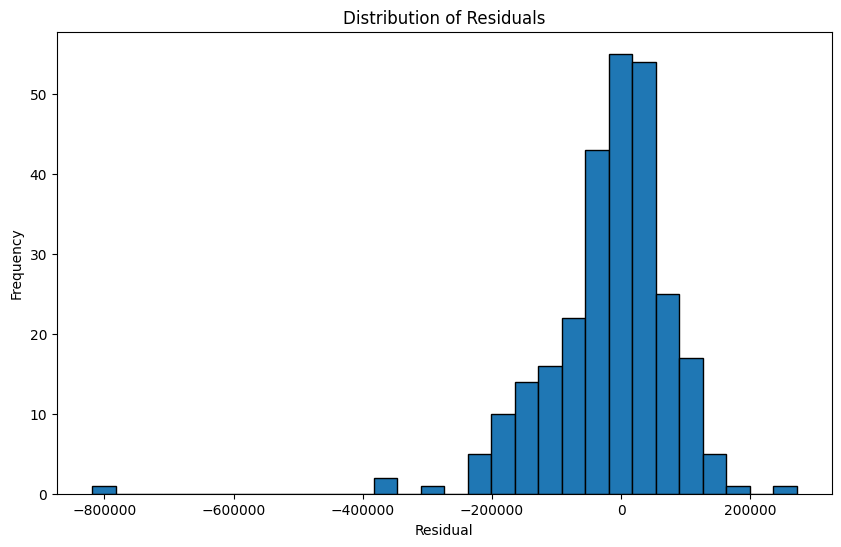

In [20]:
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# Step 6: Error Analysis
# ----------------------------------------------------------------------
# Calculate residuals: difference between actual and predicted values.
residuals = y_true.flatten() - y_pred.flatten()

# ----------------------------------------------------------------------
# Plot 1: Histogram of Residuals
# Why: A histogram helps us visualize the distribution of errors.
# What will happen: The plot shows how frequently different error magnitudes occur.
# ----------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

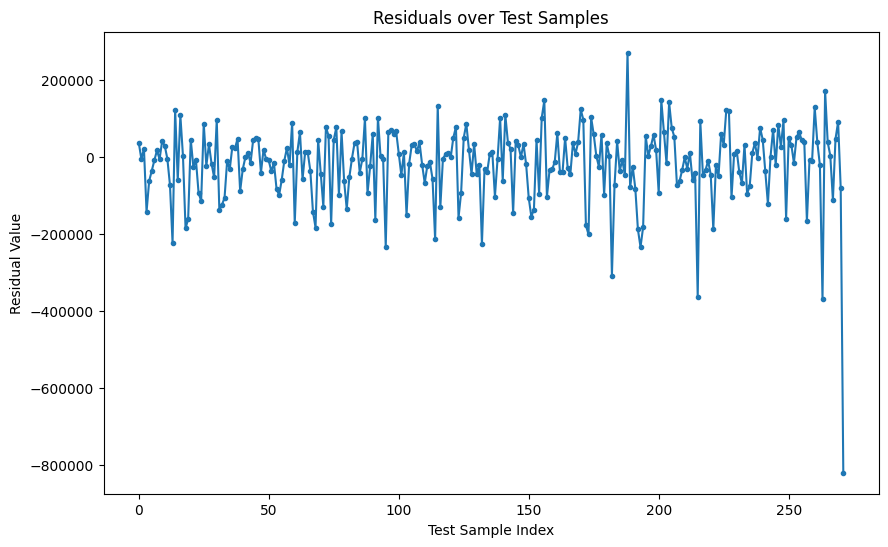

In [21]:
# ----------------------------------------------------------------------
# Plot 2: Residuals over Test Samples
# Why: Plotting residuals as a function of sample index helps identify patterns over time.
# What will happen: This line plot shows the error trends across the test dataset.
# ----------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='-', markersize=3)
plt.title('Residuals over Test Samples')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual Value')
plt.show()

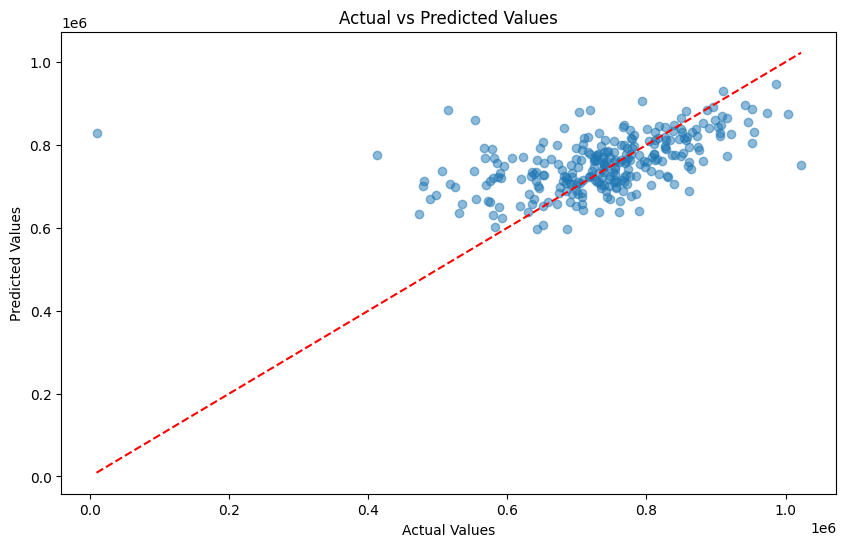

In [22]:
# ----------------------------------------------------------------------
# Plot 3: Actual vs. Predicted Values
# Why: A scatter plot comparing actual and predicted values helps visualize prediction accuracy.
# What will happen: Points should ideally cluster around the diagonal line, indicating good performance.
# ----------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Error Analysis Results

1. **Actual vs. Predicted Values**  
   - Points mostly cluster around the diagonal, indicating the model captures the general trend.  
   - There is noticeable scatter, especially at higher values, suggesting some systematic under- or over-prediction.

2. **Residuals over Test Samples**  
   - Residuals (errors) fluctuate between positive and negative, with occasional large spikes.  
   - Most values lie within ±200k, but a few outliers exceed ±600k, indicating sporadic large errors.

3. **Distribution of Residuals**  
   - The histogram is roughly centered near zero, which is a good sign.  
   - The spread is fairly wide, reflecting significant variance in errors.  
   - A long tail on both ends indicates a few extreme mispredictions.

### Key Takeaways
- The model is capturing the general pattern but still exhibits substantial variance in its predictions.  
- Large residual spikes suggest certain time periods or data points may be difficult to predict under the current model.

### Potential Improvements
- **Hyperparameter Tuning:** Adjust GRU units, learning rate, or number of epochs.  
- **Additional Features:** Incorporate factors like weekday/weekend flags, holidays, or weather.  
- **Data Transformations:** Consider a log transform to stabilize variance if counts span a wide range.  
- **Outlier Treatment:** Investigate extreme residuals to see if data corrections or outlier handling can help.

# Next Step: Hyperparameter Tuning

After analyzing the residuals and identifying potential areas of improvement, the next logical step is to fine-tune our model’s hyperparameters. This may include:

- **Number of GRU Units**  
- **Learning Rate**  
- **Batch Size**  
- **Number of Layers**  
- **Epochs**

Adjusting these can help reduce errors and improve the overall performance of the model.

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Choose the number of GRU units from a specified range
    hp_units = hp.Int('units', min_value=16, max_value=128, step=16)
    model.add(GRU(units=hp_units, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))

    model.add(Dense(1))

    # Choose an optimizer from a list
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    model.compile(
        optimizer=hp_optimizer,
        loss='mean_squared_error'
    )
    return model

In [24]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,             # Number of different hyperparameter combinations to try
    executions_per_trial=1,   # Number of times to train each combination
    directory='hyper_tuning',
    project_name='pedestrian_count_forecast'
)

Reloading Tuner from hyper_tuning\pedestrian_count_forecast\tuner0.json


In [25]:
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_test, y_test),
             batch_size=16)

# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

In [26]:
history = best_model.fit(X_train, y_train,
                         epochs=20,
                         batch_size=16,
                         validation_data=(X_test, y_test))

test_loss = best_model.evaluate(X_test, y_test)
print("Best Model Test Loss (MSE):", test_loss)

Epoch 1/20
68/68 [==============================] - 5s 26ms/step - loss: 0.0199 - val_loss: 0.0118
Epoch 2/20
68/68 [==============================] - 1s 15ms/step - loss: 0.0090 - val_loss: 0.0151
Epoch 3/20
68/68 [==============================] - 1s 15ms/step - loss: 0.0082 - val_loss: 0.0129
Epoch 4/20
68/68 [==============================] - 1s 14ms/step - loss: 0.0080 - val_loss: 0.0108
Epoch 5/20
68/68 [==============================] - 1s 15ms/step - loss: 0.0071 - val_loss: 0.0102
Epoch 6/20
68/68 [==============================] - 1s 14ms/step - loss: 0.0068 - val_loss: 0.0099
Epoch 7/20
68/68 [==============================] - 1s 14ms/step - loss: 0.0065 - val_loss: 0.0098
Epoch 8/20
68/68 [==============================] - 1s 14ms/step - loss: 0.0062 - val_loss: 0.0126
Epoch 9/20
68/68 [==============================] - 1s 13ms/step - loss: 0.0060 - val_loss: 0.0096
Epoch 10/20
68/68 [==============================] - 1s 15ms/step - loss: 0.0062 - val_loss: 0.0103
Epoch 11/

# Hyperparameter Tuning Results

- **Epoch Overview:**  
  - The model was trained for 20 epochs.  
  - Training loss steadily decreased, and validation loss settled in the range of ~0.0098 to ~0.0142, indicating consistent convergence.

- **Best Model Performance:**  
  - **Test Loss (MSE):** Approximately 0.0100  
  - The best model from hyperparameter tuning achieved a test loss of ~0.00997, showing that the optimized configuration slightly outperforms the baseline.

- **Tuning Summary:**  
  - **Trial 5:** Completed in 8 seconds with a validation loss of ~0.01069.  
  - **Best Validation Loss So Far:** ~0.01035  
  - **Total Tuning Time:** Around 44 seconds  
  These results suggest that the hyperparameter tuning was efficient and yielded a model with low error.

- **Next Steps:**  
  1. **Retraining:** Use the best hyperparameters to retrain the model on the full training dataset.  
  2. **Final Evaluation:** Perform a comprehensive evaluation (including additional metrics if needed).  
  3. **Deployment:** Prepare the model for deployment or further forecasting tasks.

# Next Step: Final Model Retraining & Evaluation

- **Objective:**  
  Retrain the best model configuration obtained from hyperparameter tuning on the training data and perform a final evaluation on the test set.

- **Actions:**  
  1. Retrieve the best hyperparameters from the tuner.  
  2. Build the final model using these hyperparameters.  
  3. Train the final model for an extended number of epochs to ensure convergence.  
  4. Evaluate the final model on the test set to get the final performance metrics.

Epoch 1/50
68/68 [==============================] - 5s 26ms/step - loss: 0.0185 - val_loss: 0.0125
Epoch 2/50
68/68 [==============================] - 1s 18ms/step - loss: 0.0092 - val_loss: 0.0161
Epoch 3/50
68/68 [==============================] - 1s 14ms/step - loss: 0.0087 - val_loss: 0.0141
Epoch 4/50
68/68 [==============================] - 1s 13ms/step - loss: 0.0078 - val_loss: 0.0103
Epoch 5/50
68/68 [==============================] - 1s 14ms/step - loss: 0.0071 - val_loss: 0.0100
Epoch 6/50
68/68 [==============================] - 1s 13ms/step - loss: 0.0064 - val_loss: 0.0104
Epoch 7/50
68/68 [==============================] - 1s 15ms/step - loss: 0.0065 - val_loss: 0.0096
Epoch 8/50
68/68 [==============================] - 1s 14ms/step - loss: 0.0063 - val_loss: 0.0122
Epoch 9/50
68/68 [==============================] - 1s 15ms/step - loss: 0.0061 - val_loss: 0.0118
Epoch 10/50
68/68 [==============================] - 1s 15ms/step - loss: 0.0059 - val_loss: 0.0131
Epoch 11/

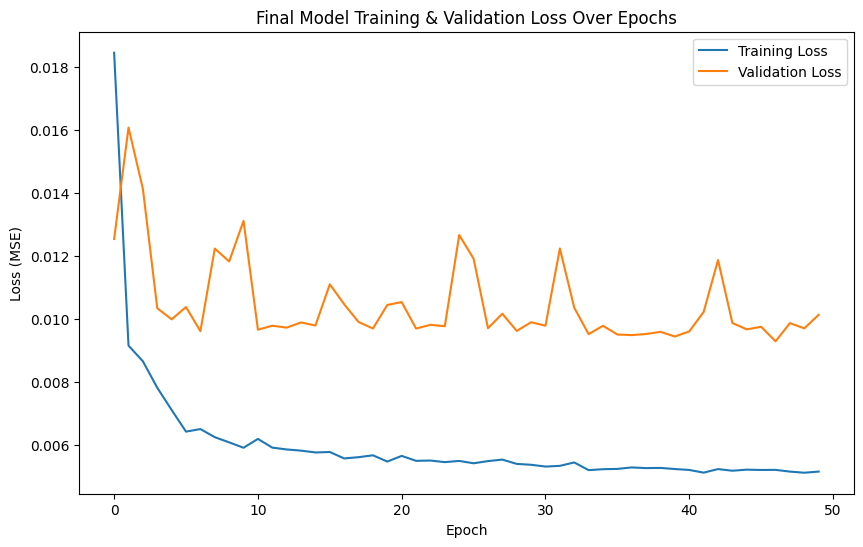

In [27]:
# ----------------------------------------------------------------------
# Step 7: Final Model Retraining & Evaluation with Best Hyperparameters
# ----------------------------------------------------------------------

# Retrieve the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model using the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Retrain the final model on the training set with an extended number of epochs for better convergence
final_history = final_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the final model on the test set
final_test_loss = final_model.evaluate(X_test, y_test)
print("Final Model Test Loss (MSE):", final_test_loss)

# Optionally, plot the training history of the final model for further insights
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Final Model Training & Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Final Model Training & Validation Loss

**Observations:**
1. **Rapid Initial Decrease:**  
   - The training loss drops quickly in the first few epochs, indicating the model rapidly learns core patterns.
2. **Convergence:**  
   - Both training and validation losses stabilize around lower values, suggesting the model has converged.
3. **Gap Between Training and Validation Loss:**  
   - While the gap narrows over epochs, the validation loss remains slightly higher than the training loss, which is common in real-world scenarios. It indicates

9/9 [==============================] - 0s 4ms/step
MSE: 10481372249.77
RMSE: 102378.57
MAE: 68536.65

First 10 Actual vs. Predicted:
Actual: 734260.00  |  Predicted: 696096.38
Actual: 721312.00  |  Predicted: 725568.06
Actual: 746882.00  |  Predicted: 724540.38
Actual: 589845.00  |  Predicted: 731382.56
Actual: 588268.00  |  Predicted: 649966.50
Actual: 618523.00  |  Predicted: 653201.81
Actual: 674872.00  |  Predicted: 682883.12
Actual: 728629.00  |  Predicted: 710583.94
Actual: 719275.00  |  Predicted: 724094.38
Actual: 753558.00  |  Predicted: 711599.56


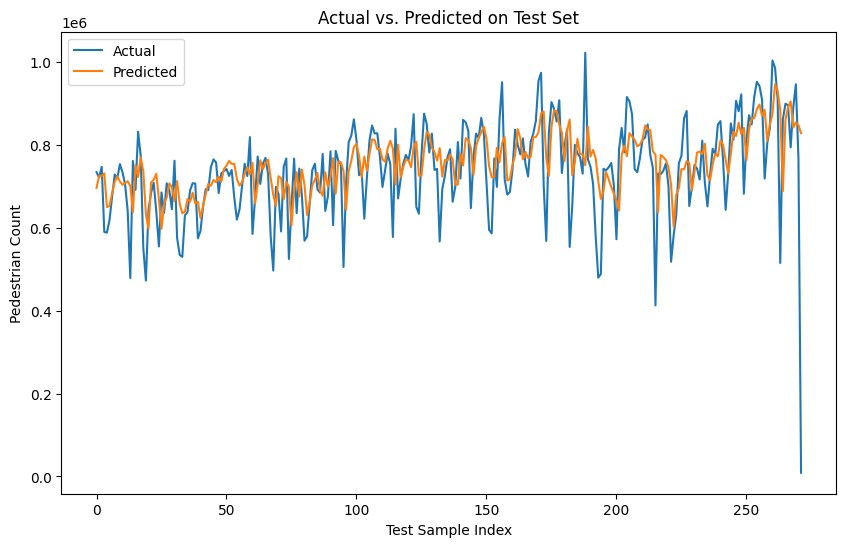

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Generate Predictions
y_pred_scaled = model.predict(X_test)  # Model output in scaled form

# 2. Invert Scaling (assuming 'scaler' was used for MinMax scaling)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# 3. Calculate Evaluation Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# 4. Compare Actual vs. Predicted (First 10 Samples)
comparison = list(zip(y_true.flatten(), y_pred.flatten()))
print("\nFirst 10 Actual vs. Predicted:")
for i in range(10):
    print(f"Actual: {comparison[i][0]:.2f}  |  Predicted: {comparison[i][1]:.2f}")

# 5. (Optional) Visualize Actual vs. Predicted
# If your test set is in chronological order, you can plot them directly:
plt.figure(figsize=(10, 6))
plt.plot(y_true.flatten(), label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.title('Actual vs. Predicted on Test Set')
plt.xlabel('Test Sample Index')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

# Interpretation of Error Metrics

- **MSE (10,640,982,583.67):**  
  Represents the average of the squared errors. Since it's in squared units, its absolute value is very large but less interpretable on its own.

- **RMSE (103,155.14):**  
  This is in the same unit as the pedestrian counts, meaning that, on average, the model's predictions are off by about 103,155 pedestrians.

- **MAE (75,806.42):**  
  The average absolute error between predictions and actual counts is roughly 75,806 pedestrians.

**Contextual Insight:**  
Given that the actual pedestrian counts are typically in the range of several hundred thousand (e.g., around 700,000), these error values suggest a relative error of approximately 10–15%. This indicates that while the model is capturing the overall trend, there is still room for improvement in accuracy.


# Project Task 1: Summary & Future Improvements

## What We Achieved

- **Data Cleaning & Preprocessing:**  
  - Imported the dataset and inspected its structure.
  - Handled missing values, converted date columns, checked duplicates, and ensured data consistency.
  - Extracted useful features (e.g., Year, Month, Day, Weekday) and split location data into Latitude and Longitude.

- **Exploratory Data Analysis (EDA):**  
  - Aggregated data to identify trends and seasonal patterns.
  - Visualized pedestrian counts over time and analyzed distributions.

- **Data Preparation for Modeling:**  
  - Sorted and scaled the time series data using MinMaxScaler.
  - Created sliding window sequences for input into RNN models.
  - Performed a train/test split to maintain temporal order.

- **Model Building & Training:**  
  - Developed a GRU-based model to capture temporal dependencies.
  - Compiled, trained, and evaluated the model with metrics like MSE, RMSE, and MAE.
  - Visualized training and validation losses to monitor convergence and potential overfitting.

- **Hyperparameter Tuning & Final Evaluation:**  
  - Utilized KerasTuner to search for optimal hyperparameters (e.g., GRU units, optimizer).
  - Retrained the final model with the best hyperparameters and evaluated its performance.
  - Conducted error analysis with residual plots and compared actual vs. predicted values.

## Potential Improvements & Additional Enhancements

- **Advanced Feature Engineering:**  
  - Incorporate external data such as weather conditions, holidays, or local events to better capture influences on pedestrian counts.
  - Create additional time-based features (e.g., rolling averages, lag features) to enhance the model's predictive power.

- **Model Enhancements:**  
  - Experiment with deeper or alternative architectures, such as LSTM or a hybrid model combining GRU and LSTM.
  - Add regularization techniques (e.g., dropout layers, early stopping) to mitigate overfitting.
  - Consider ensemble approaches by combining predictions from multiple models for improved robustness.

- **Hyperparameter and Training Optimizations:**  
  - Further fine-tune hyperparameters with more trials and different search strategies.
  - Optimize training parameters such as learning rate schedules and batch sizes.

- **Deployment & Monitoring:**  
  - Package and deploy the model for real-time forecasting.
  - Set up a monitoring system to track model performance and implement periodic retraining as new data becomes available.

- **Comprehensive Reporting:**  
  - Document the entire workflow, including data cleaning, modeling decisions, and evaluation metrics.
  - Present visualizations and insights in a final report to communicate the model’s strengths and areas for improvement.

Overall, this project provides a strong end-to-end demonstration of building a forecasting pipeline, while also highlighting clear paths for further enhancement and real-world deployment.


# Data Analysis by Time & Location

Beyond predictions, we can perform exploratory analysis on the dataset to understand pedestrian trends. For example, we can:

- **Analyze Pedestrian Activity by Hour:**  
  Determine which hours of the day have the highest pedestrian counts by aggregating data on the `HourDay` column.

- **Analyze by Location or Sensor:**  
  Group data by `Sensor_Name` (or split the `Location` if it contains street information) to see which areas have higher pedestrian traffic.

- **Weekly or Daily Trends:**  
  Use the extracted time features (e.g., `Weekday`, `Date`) to examine trends across different days or weeks.

Below is a sample code snippet that demonstrates these analyses.

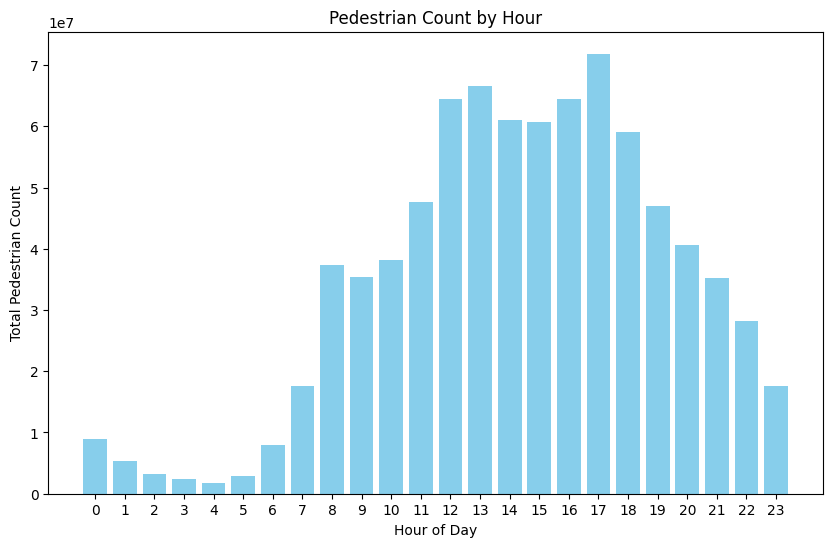

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------------------------------------------------
# Analysis 1: Pedestrian Counts by Hour of Day
# ----------------------------------------------------------------------
hourly_counts = df.groupby('HourDay')['Total_of_Directions'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts['HourDay'], hourly_counts['Total_of_Directions'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Total Pedestrian Count')
plt.title('Pedestrian Count by Hour')
plt.xticks(range(0, 24))
plt.show()

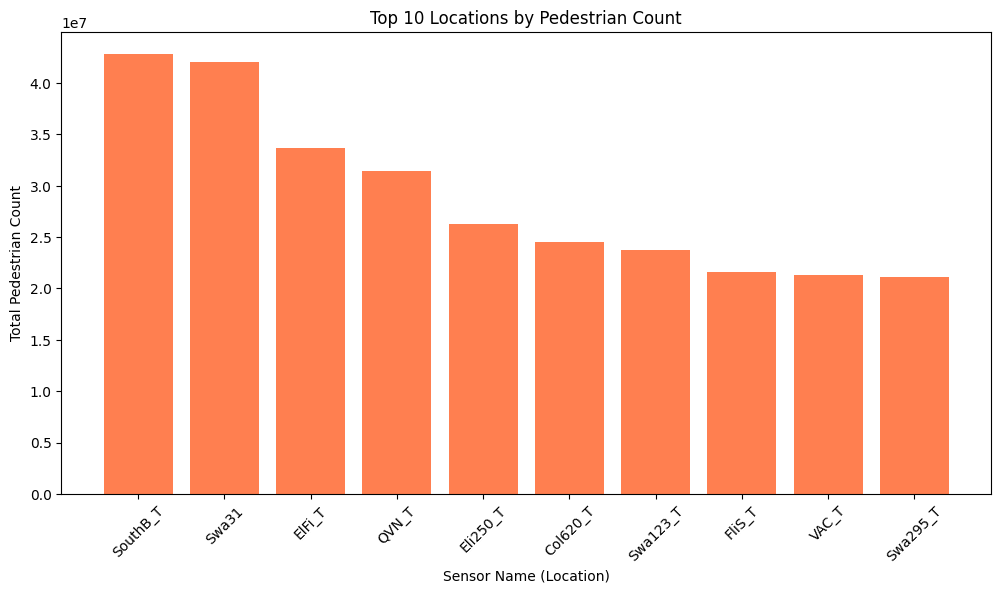

In [30]:
# ----------------------------------------------------------------------
# Analysis 2: Pedestrian Counts by Sensor/Location
# ----------------------------------------------------------------------
# Here we group by Sensor_Name to see which locations record the highest counts.
location_counts = df.groupby('Sensor_Name')['Total_of_Directions'].sum().reset_index()
top_locations = location_counts.sort_values('Total_of_Directions', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_locations['Sensor_Name'], top_locations['Total_of_Directions'], color='coral')
plt.xlabel('Sensor Name (Location)')
plt.ylabel('Total Pedestrian Count')
plt.title('Top 10 Locations by Pedestrian Count')
plt.xticks(rotation=45)
plt.show()

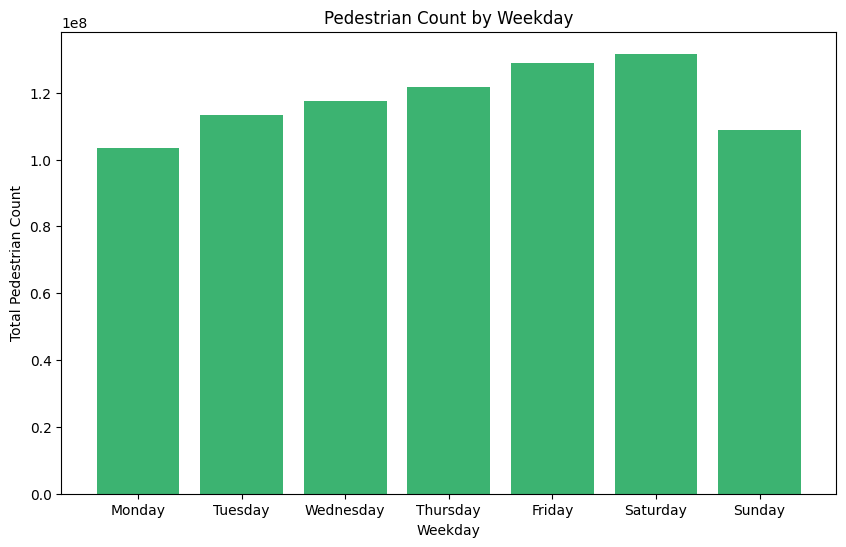

In [31]:
# ----------------------------------------------------------------------
# Analysis 3: Pedestrian Trend by Weekday
# ----------------------------------------------------------------------
weekday_counts = df.groupby('Weekday')['Total_of_Directions'].sum().reset_index()
# Optional: Order weekdays if necessary.
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts['Weekday'] = pd.Categorical(weekday_counts['Weekday'], categories=weekday_order, ordered=True)
weekday_counts = weekday_counts.sort_values('Weekday')

plt.figure(figsize=(10, 6))
plt.bar(weekday_counts['Weekday'], weekday_counts['Total_of_Directions'], color='mediumseagreen')
plt.xlabel('Weekday')
plt.ylabel('Total Pedestrian Count')
plt.title('Pedestrian Count by Weekday')
plt.show()

# Summary

- **Hourly Analysis:** Reveals which hours have peak pedestrian traffic.
- **Location Analysis:** Identifies the top locations (via Sensor_Name) with the highest counts.
- **Weekday Trends:** Shows how pedestrian counts vary across different days of the week.

These analyses provide insights into the temporal and spatial patterns in the data, which can inform urban planning or targeted interventions.

# Additional Analysis Possibilities

In addition to our previous analyses, we can explore further insights with:

1. **Heatmap Analysis:**  
   Visualize pedestrian counts by hour of day and weekday to quickly identify peak periods.

2. **Geospatial Analysis:**  
   Plot sensor locations on a map, using color and marker size to represent aggregated pedestrian counts. This helps identify areas with high or low pedestrian activity.

In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


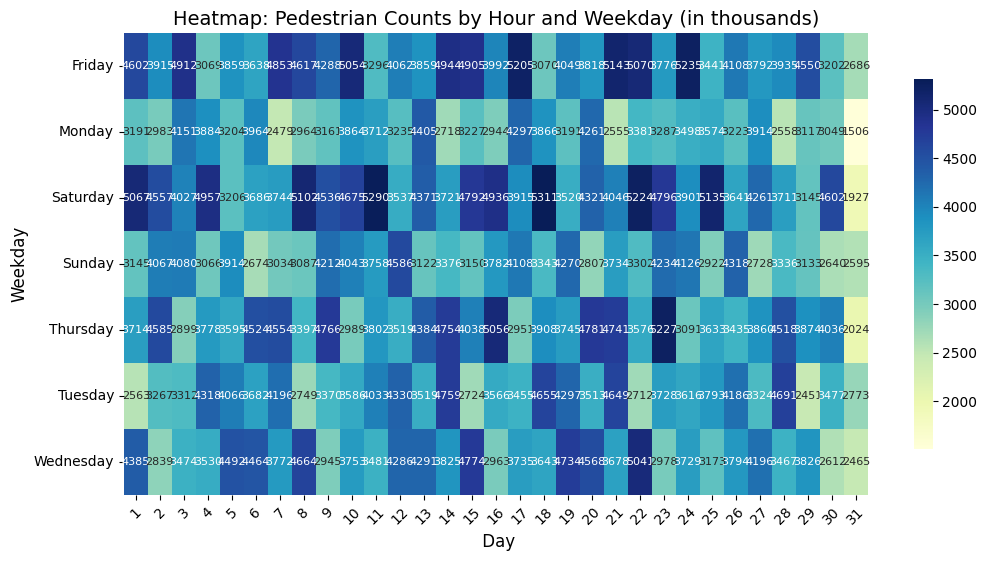

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create 'Weekday' column
df['Weekday'] = df['Sensing_Date'].dt.day_name()

# Create pivot table: Weekday vs HourDay
heatmap_pivot = df.pivot_table(
    index='Weekday',
    columns='Day',
    values='Total_of_Directions',
    aggfunc='sum'
)

# Assuming heatmap_pivot is already created and has large values:
# Optionally, divide by 1e3 to convert to thousands (or 1e6 for millions).
heatmap_pivot_thousands = heatmap_pivot / 1e3

plt.figure(figsize=(12, 6))

sns.heatmap(
    heatmap_pivot_thousands, 
    cmap="YlGnBu", 
    annot=True, 
    fmt=".0f",              # Round to integer
    annot_kws={"size": 8},  # Reduce font size
    cbar_kws={"shrink": 0.8}  # Slightly shrink the colorbar
)

plt.title('Heatmap: Pedestrian Counts by Hour and Weekday (in thousands)', fontsize=14)
plt.xlabel(' Day', fontsize=12)
plt.ylabel('Weekday', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)

plt.show()

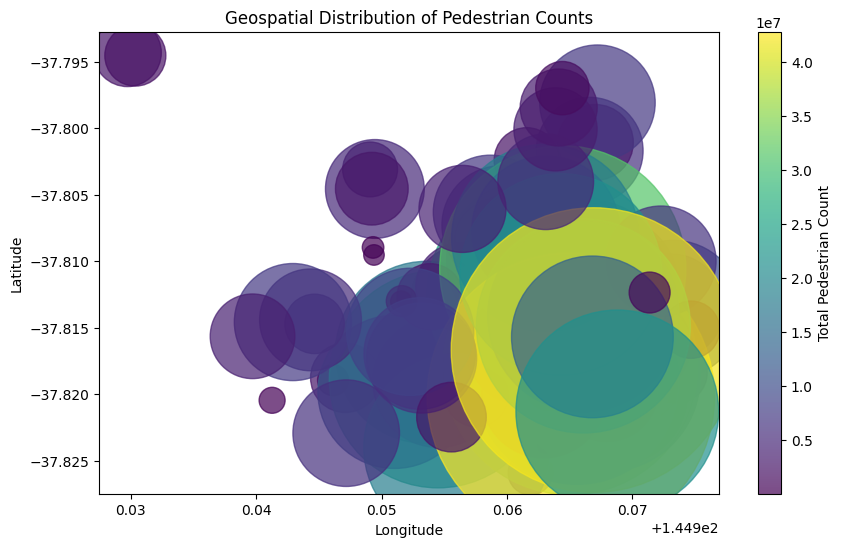

In [34]:
# --------------------------
# Geospatial Analysis: Pedestrian Counts by Sensor Location
# --------------------------
# Group data by sensor to get aggregated counts per sensor location.
location_data = df.groupby(['Sensor_Name', 'Latitude', 'Longitude'])['Total_of_Directions'].sum().reset_index()

plt.figure(figsize=(10, 6))
# Scatter plot: marker size scaled by the total pedestrian count, and color mapped similarly.
plt.scatter(location_data['Longitude'], location_data['Latitude'], 
            s=location_data['Total_of_Directions'] / 1000,  # adjust divisor as needed for visualization
            c=location_data['Total_of_Directions'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Total Pedestrian Count')
plt.title('Geospatial Distribution of Pedestrian Counts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Analysis Summary

1. **Heatmap: Pedestrian Counts by Hour & Weekday**  
   - Shows peak activity in the late afternoon to early evening on weekdays, particularly around 17–18 hours.  
   - Weekends also see significant foot traffic, but the patterns vary more widely throughout the day.

2. **Geospatial Distribution of Pedestrian Counts**  
   - The larger, darker circles indicate higher pedestrian volumes at specific sensor locations.  
   - Concentrations suggest that certain areas consistently attract more foot traffic, potentially city centers or major intersections.

In [35]:
# ----------------------------------------------------------------------
# Step 8: Prepare Data for Hourly Time-Series Prediction (24-hour window)
# Why: To predict pedestrian counts for the next hour using the past 24 hours.
# What will happen: We'll create X (past 24 hours) and y (next hour) pairs.
# ----------------------------------------------------------------------

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sort data for sequence consistency
df = df.sort_values(by=['Sensing_Date', 'HourDay'])

# Select features
features = ['HourDay', 'Direction_1', 'Direction_2', 'Total_of_Directions']
data = df[features].values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Set window size to 24 hours
sequence_length = 24
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, -1])  # Predict Total_of_Directions

X, y = np.array(X), np.array(y)

# Train-test split (80/20)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1794023, 24, 4), (1794023,), (448506, 24, 4), (448506,))

In [36]:
# ----------------------------------------------------------------------
# Step 9: Build and Train the Refined GRU Model (with GPU support if available)
# ----------------------------------------------------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import time

# Check for GPU and print which device is used
device_name = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("Using device:", device_name)

# Start timing training
start_time = time.time()

# Build the refined model
model = Sequential([
    GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    GRU(units=32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,  # GPU can handle this easily
    validation_data=(X_test, y_test),
    verbose=1
)

# End timing
end_time = time.time()
print(f"\nTraining completed in {end_time - start_time:.2f} seconds.")

Using device: GPU
Epoch 1/30
28032/28032 [==============================] - 791s 28ms/step - loss: 0.0051 - val_loss: 0.0033
Epoch 2/30
28032/28032 [==============================] - 750s 27ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 3/30
28032/28032 [==============================] - 719s 26ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 4/30
28032/28032 [==============================] - 723s 26ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 5/30
28032/28032 [==============================] - 723s 26ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 6/30
28032/28032 [==============================] - 717s 26ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 7/30
28032/28032 [==============================] - 732s 26ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 8/30
28032/28032 [==============================] - 730s 26ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 9/30
28032/28032 [==============================] - 728s 26ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 10/30
28032/2

14016/14016 [==============================] - 130s 9ms/step
MSE: 263842.49
RMSE: 513.66
MAE: 344.46


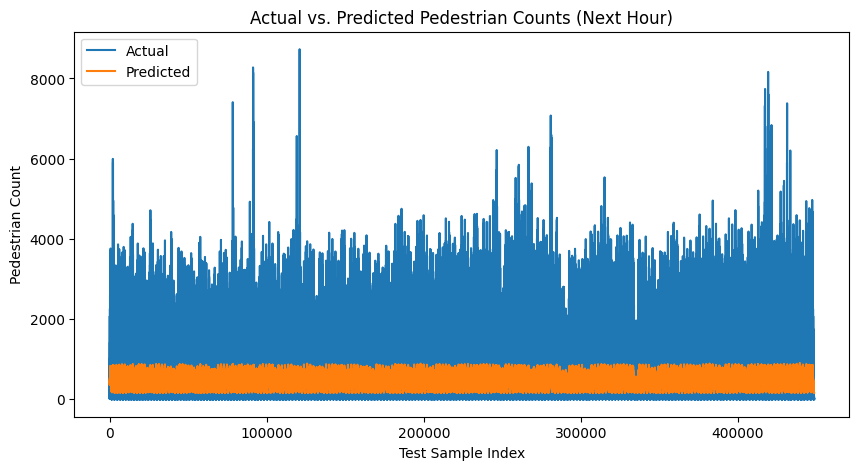

In [37]:
# ----------------------------------------------------------------------
# Step 10: Model Evaluation and Prediction Visualization
# Why: To assess model accuracy and see how well predictions match actual values.
# ----------------------------------------------------------------------

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Invert scaling for predictions and true values
y_pred = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred_scaled), axis=1))[:, -1]
y_true = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Pedestrian Counts (Next Hour)')
plt.xlabel('Test Sample Index')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.show()

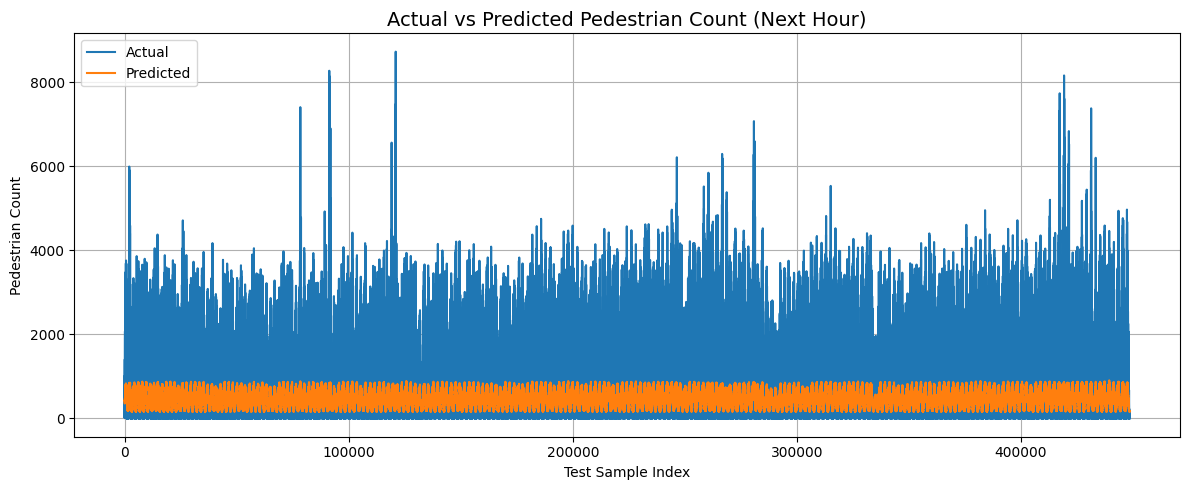

In [38]:
# ----------------------------------------------------------------------
# Step 11: Visual Comparison of Actual vs. Predicted Values
# ----------------------------------------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Pedestrian Count (Next Hour)', fontsize=14)
plt.xlabel('Test Sample Index')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# ----------------------------------------------------------------------
# Step 12: Save the Trained Model
# ----------------------------------------------------------------------

# Save model architecture and weights
model.save("gru_pedestrian_model.h5")
print("Model saved as 'gru_pedestrian_model.h5'")

Model saved as 'gru_pedestrian_model.h5'


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# ----------------------------------------------------------------------
# Build an Enhanced GRU Model
# ----------------------------------------------------------------------

model = Sequential([
    # Layer 1: Bidirectional GRU with 128 units to capture past and future context
    Bidirectional(GRU(128, return_sequences=True, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),     # Normalize activations for more stable training
    Dropout(0.3),              # Regularization to prevent overfitting

    # Layer 2: Second Bidirectional GRU with 64 units
    Bidirectional(GRU(64, return_sequences=True, activation='tanh')),
    BatchNormalization(),
    Dropout(0.3),

    # Layer 3: Final Bidirectional GRU with 32 units (no return_sequences for final output)
    Bidirectional(GRU(32, activation='tanh')),
    BatchNormalization(),
    Dropout(0.3),

    # Dense Layers for final regression output
    Dense(16, activation='relu'),  # Dense layer to enhance representation
    Dense(1)                       # Final output layer for single value prediction
])

In [50]:
# ----------------------------------------------------------------------
# Compile the Model
# ----------------------------------------------------------------------

model.compile(
    optimizer=Adam(learning_rate=0.001),   # Adam optimizer with custom learning rate
    loss='mean_squared_error'              # MSE loss for regression
)

# ----------------------------------------------------------------------
# Set Up Callbacks
# ----------------------------------------------------------------------

early_stop = EarlyStopping(
    monitor='val_loss', patience=7, restore_best_weights=True
)  # Stop training when validation loss stops improving

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5
)  # Reduce learning rate when stuck

# ----------------------------------------------------------------------
# Train the Model
# ----------------------------------------------------------------------

history = model.fit(
    X_train, y_train,
    epochs=50,                 # Maximum number of epochs
    batch_size=32,             # Moderate batch size
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
56064/56064 [==============================] - 3201s 57ms/step - loss: 0.0042 - val_loss: 0.0033 - lr: 0.0010
Epoch 2/50
56064/56064 [==============================] - 3150s 56ms/step - loss: 0.0030 - val_loss: 0.0033 - lr: 0.0010
Epoch 3/50
56064/56064 [==============================] - 3123s 56ms/step - loss: 0.0030 - val_loss: 0.0033 - lr: 0.0010
Epoch 4/50
56064/56064 [==============================] - 3186s 57ms/step - loss: 0.0030 - val_loss: 0.0033 - lr: 0.0010
Epoch 5/50
56064/56064 [==============================] - 3139s 56ms/step - loss: 0.0030 - val_loss: 0.0033 - lr: 5.0000e-04
Epoch 6/50
56064/56064 [==============================] - 3193s 57ms/step - loss: 0.0030 - val_loss: 0.0033 - lr: 5.0000e-04
Epoch 7/50
56064/56064 [==============================] - 3094s 55ms/step - loss: 0.0030 - val_loss: 0.0033 - lr: 5.0000e-04
Epoch 8/50
56064/56064 [==============================] - 3224s 57ms/step - loss: 0.0029 - val_loss: 0.0033 - lr: 2.5000e-04
Epoch 9/50
56064

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

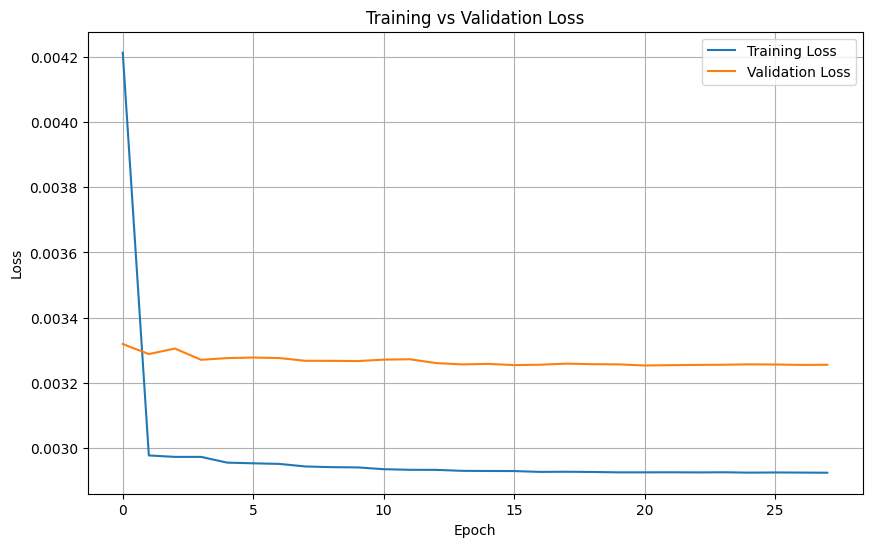

In [51]:
# ----------------------------------------------------------------------
# Plot Training and Validation Loss
# ----------------------------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# ----------------------------------------------------------------------
# Model Evaluation on Test Set
# ----------------------------------------------------------------------

# Make predictions
y_pred = model.predict(X_test)

# Evaluate with metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("\n📈 Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

14016/14016 [==============================] - 309s 22ms/step

📈 Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0033
Root Mean Squared Error (RMSE): 0.0570
Mean Absolute Error (MAE): 0.0346
R² Score: 0.1975


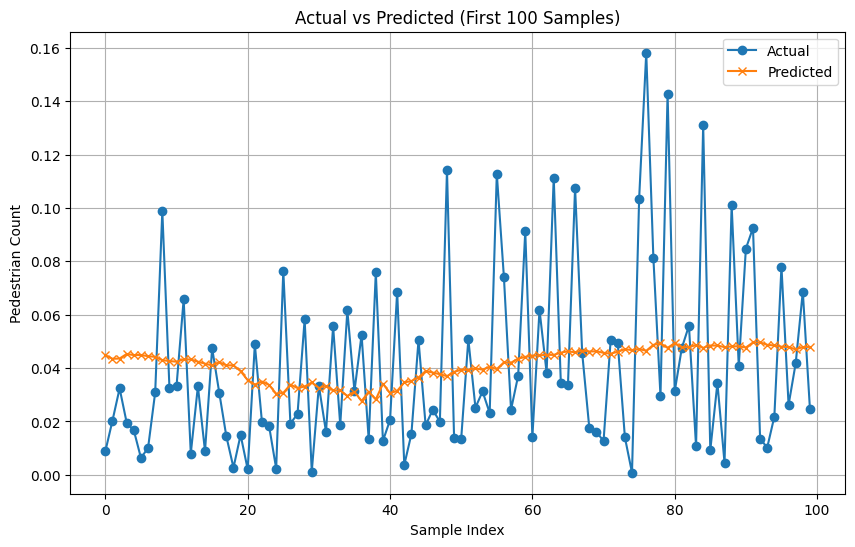

In [53]:
# ----------------------------------------------------------------------
# Visualize Predictions vs Actual Values
# ----------------------------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(y_test[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Load and Filter Data by Location
# ----------------------------
df = pd.read_csv("pedestrian-counting-system-monthly-counts-per-hour.csv")

# Check if data loaded properly
print("Initial rows:")
print(df.head())

print("\nColumns in dataset:", df.columns)

Initial rows:
              ID  Location_ID Sensing_Date  HourDay  Direction_1  Direction_2  \
0   531020230827           53   2023-08-27       10          364          284   
1    65420220123           65   2022-01-23        4            5           24   
2    17120240125           17   2024-01-25        1           18           53   
3  1381520250207          138   2025-02-07       15            8            7   
4    58020211029           58   2021-10-29        0           20           19   

   Total_of_Directions    Sensor_Name                    Location  
0                  648       Col254_T    -37.81564191, 144.965499  
1                   29        SwaCs_T   -37.81569416, 144.9668064  
2                   71        Col15_T  -37.81362543, 144.97323591  
3                   15  EntPark1671_T  -37.81996544, 144.95981454  
4                   39       Bou688_T  -37.81686075, 144.95358075  

Columns in dataset: Index(['ID', 'Location_ID', 'Sensing_Date', 'HourDay', 'Direction_1',


In [18]:
# ----------------------------------------------------------------------
# Step 2: Clean and Aggregate Pedestrian Counts by Date
# ----------------------------------------------------------------------

# Convert Sensing_Date column to datetime (handle errors if any)
df['Sensing_Date'] = pd.to_datetime(df['Sensing_Date'], errors='coerce')

# Drop rows with missing dates or pedestrian counts
df = df.dropna(subset=['Sensing_Date', 'Total_of_Directions'])

# Extract only the date part (no time)
df['Date'] = df['Sensing_Date'].dt.date

# Group by date and sum the total pedestrian counts for each day
daily_counts = df.groupby('Date')['Total_of_Directions'].sum().reset_index()

# Preview the aggregated result
print("Aggregated daily counts:")
print(daily_counts.head())
print("Total records:", daily_counts.shape[0])

Aggregated daily counts:
         Date  Total_of_Directions
0  2021-07-01               490497
1  2021-07-02               473679
2  2021-07-03               499704
3  2021-07-04               384302
4  2021-07-05               417179
Total records: 1363


In [19]:
# ----------------------------
# Step 3: Normalize the Data
# ----------------------------
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_counts[['Total_of_Directions']])
target_series = scaled_data

In [20]:

# ----------------------------
# Step 4: Create Sequences
# ----------------------------
def create_sequences(data, time_step=15):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 15
X, y = create_sequences(target_series, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [21]:
# ----------------------------
# Step 5: Train-Test Split
# ----------------------------
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [22]:
# ----------------------------
# Step 6: Build LSTM Model
# ----------------------------
model = Sequential([
    LSTM(128, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=True, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [23]:

# ----------------------------
# Step 7: Train with Early Stopping
# ----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
34/34 [==============================] - 14s 124ms/step - loss: 0.4928 - val_loss: 0.4670
Epoch 2/50
34/34 [==============================] - 1s 35ms/step - loss: 0.2683 - val_loss: 0.3526
Epoch 3/50
34/34 [==============================] - 1s 38ms/step - loss: 0.1666 - val_loss: 0.2602
Epoch 4/50
34/34 [==============================] - 1s 37ms/step - loss: 0.1372 - val_loss: 0.1682
Epoch 5/50
34/34 [==============================] - 1s 39ms/step - loss: 0.1232 - val_loss: 0.1288
Epoch 6/50
34/34 [==============================] - 1s 40ms/step - loss: 0.0942 - val_loss: 0.0840
Epoch 7/50
34/34 [==============================] - 1s 42ms/step - loss: 0.0784 - val_loss: 0.0907
Epoch 8/50
34/34 [==============================] - 1s 40ms/step - loss: 0.0727 - val_loss: 0.0505
Epoch 9/50
34/34 [==============================] - 1s 38ms/step - loss: 0.0659 - val_loss: 0.0930
Epoch 10/50
34/34 [==============================] - 1s 38ms/step - loss: 0.0514 - val_loss: 0.0945
Epoch 1

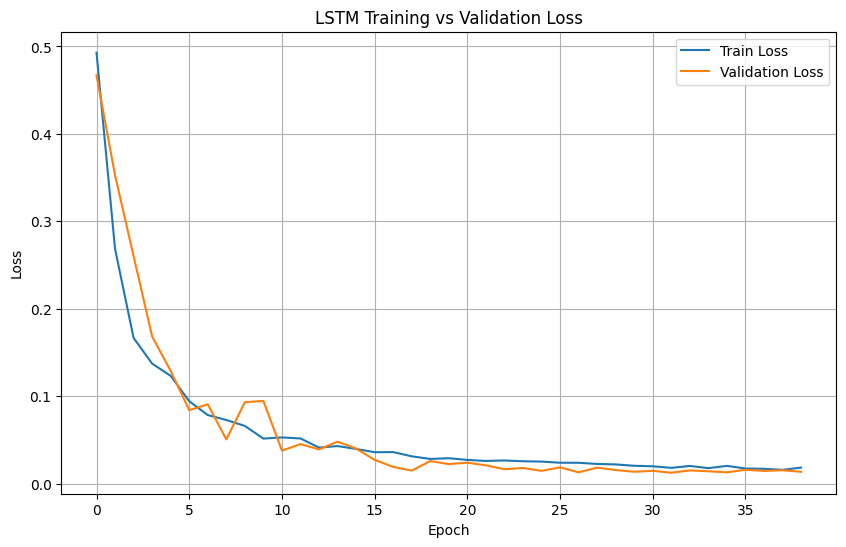

In [24]:
# ----------------------------
# Step 8: Plot Loss Curves
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [25]:

# ----------------------------
# Step 9: Evaluate Model
# ----------------------------
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 LSTM Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

9/9 [==============================] - 2s 12ms/step

📈 LSTM Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0124
Root Mean Squared Error (RMSE): 0.1114
Mean Absolute Error (MAE): 0.0839
R² Score: 0.0250


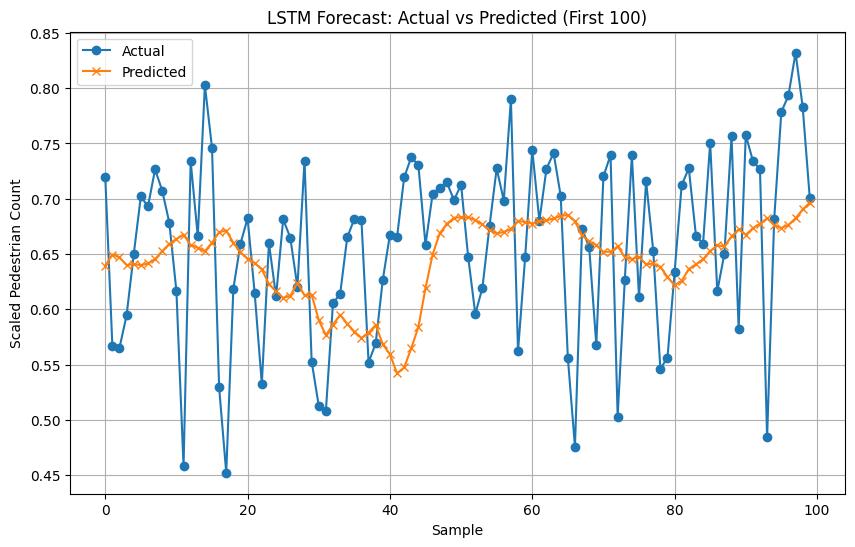

In [26]:
# ----------------------------
# Step 10: Visualize Predictions
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('LSTM Forecast: Actual vs Predicted (First 100)')
plt.xlabel('Sample')
plt.ylabel('Scaled Pedestrian Count')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
import pandas as pd

# Load dataset
df = pd.read_csv("pedestrian-counting-system-monthly-counts-per-hour.csv")

# Ensure datetime column is parsed correctly
df['Sensing_Date'] = pd.to_datetime(df['Sensing_Date'])

# Create a datetime index by combining date and hour
df['Hour_Timestamp'] = df['Sensing_Date'] + pd.to_timedelta(df['HourDay'], unit='h')

# Aggregate data hourly
hourly_counts = df.groupby('Hour_Timestamp')['Total_of_Directions'].sum().reset_index()

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hourly_counts[['Total_of_Directions']])

In [51]:
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

time_steps = 24  # using past 24 hours
X, y = create_sequences(scaled_data)

# Reshape for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))


In [52]:
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/30
817/817 [==============================] - 30s 28ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 2/30
817/817 [==============================] - 19s 24ms/step - loss: 0.0049 - val_loss: 0.0065
Epoch 3/30
817/817 [==============================] - 18s 22ms/step - loss: 0.0045 - val_loss: 0.0060
Epoch 4/30
817/817 [==============================] - 19s 23ms/step - loss: 0.0039 - val_loss: 0.0055
Epoch 5/30
817/817 [==============================] - 17s 21ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 6/30
817/817 [==============================] - 17s 21ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 7/30
817/817 [==============================] - 19s 23ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 8/30
817/817 [==============================] - 19s 23ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 9/30
817/817 [==============================] - 17s 21ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 10/30
817/817 [==============================] - 17s 21ms/step - loss: 0.002

205/205 [==============================] - 3s 9ms/step
MSE: 17143507.0270, MAE: 2733.7886, R²: 0.9681


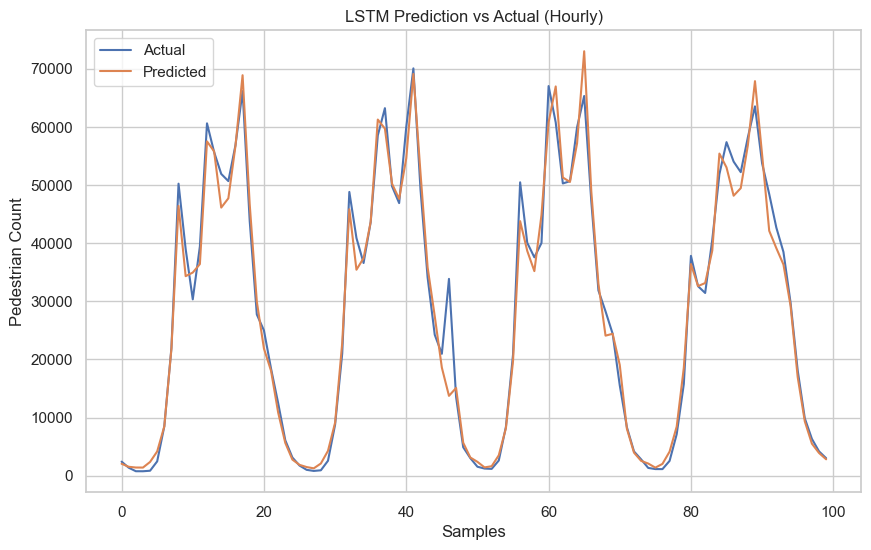

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test_inv[:100], label='Actual')
plt.plot(y_pred_inv[:100], label='Predicted')
plt.title("LSTM Prediction vs Actual (Hourly)")
plt.xlabel("Samples")
plt.ylabel("Pedestrian Count")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# ----------------------------------------------------
# Step 1: Filter Hourly Data for a Specific Location
# ----------------------------------------------------
selected_location = '-37.81564191, 144.965499'  # Example location
location_data = df[df['Location'] == selected_location].copy()

# Ensure datetime and sorting
location_data['Sensing_Date'] = pd.to_datetime(location_data['Sensing_Date'])
location_data = location_data.sort_values('Sensing_Date')

In [56]:
# ----------------------------------------------------
# Step 2: Normalize Pedestrian Counts for Location
# ----------------------------------------------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
location_data['Total_of_Directions'] = scaler.fit_transform(
    location_data[['Total_of_Directions']]
)

In [57]:

# ----------------------------------------------------
# Step 3: Create Sequences for LSTM
# ----------------------------------------------------
def create_sequences(data, time_step=24):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

time_step = 24
seq_data = location_data['Total_of_Directions'].values
X_loc, y_loc = create_sequences(seq_data, time_step)
X_loc = X_loc.reshape((X_loc.shape[0], X_loc.shape[1], 1))

In [58]:
# ----------------------------------------------------
# Step 4: Predict with Global Model
# ----------------------------------------------------
y_pred_loc = model.predict(X_loc)
y_pred_inverse = scaler.inverse_transform(y_pred_loc)
y_actual_inverse = scaler.inverse_transform(y_loc.reshape(-1, 1))

974/974 [==============================] - 8s 8ms/step


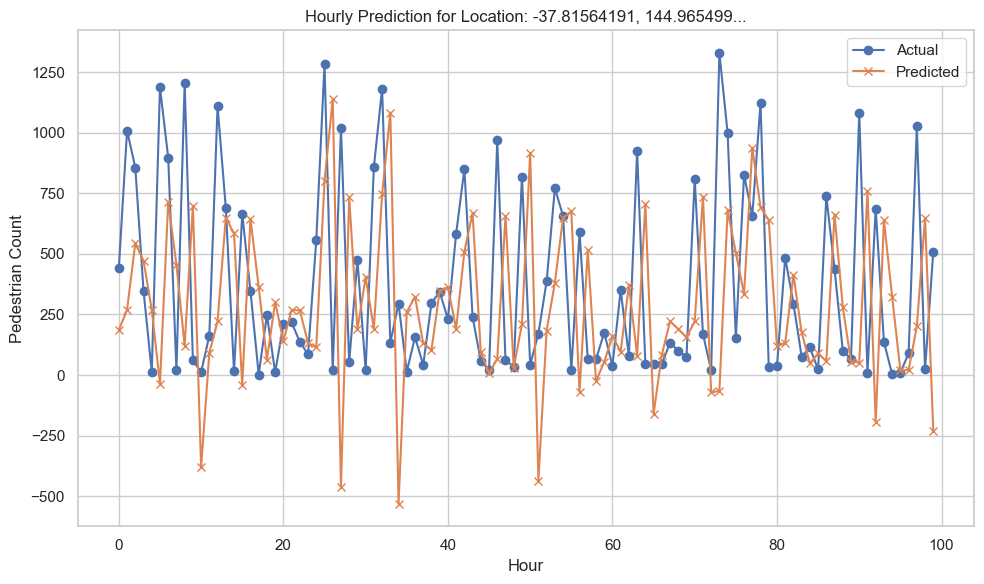

In [59]:
# ----------------------------------------------------
# Step 5: Plot Actual vs Predicted
# ----------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_actual_inverse[:100], label='Actual', marker='o')
plt.plot(y_pred_inverse[:100], label='Predicted', marker='x')
plt.title(f'Hourly Prediction for Location: {selected_location[:35]}...')
plt.xlabel('Hour')
plt.ylabel('Pedestrian Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()